# 와인 품질 예측 모델 만들기 EDA

### 와인 품질 데이터 탐색

In [1]:
import pandas as pd
import numpy as np

In [2]:
# 레드와인 데이터 로드
redwine = pd.read_csv('C:/Users/Yoo/Documents/Study/Bigdata center/data/wine/winequality_red.csv',sep=';',header=0)
redwine['type'] = 'red'
redwine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [3]:
# 화이트와인 데이터 로드
whitewine = pd.read_csv('C:/Users/Yoo/Documents/Study/Bigdata center/data/wine/winequality_white.csv',sep=';',header=0)
whitewine['type'] = 'white'
whitewine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,white
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,white
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,white
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white


In [4]:
# 레드, 화이트 와인 데이터 합치기
wine = redwine.append(whitewine)
wine.shape

(6497, 13)

In [5]:
# 변수명의 띄어쓰기 _로 변환
wine.columns = wine.columns.str.replace(' ',"_")
wine.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [6]:
# 요약통계량
wine.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [7]:
# 퀄리티의 개별통계량(Series 객체)
wine.quality.describe()

count    6497.000000
mean        5.818378
std         0.873255
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         9.000000
Name: quality, dtype: float64

In [8]:
# 퀄리티의 범주들 확인(Series 객체)
sorted(wine.quality.unique())

[3, 4, 5, 6, 7, 8, 9]

In [9]:
# 퀄리티의 범주들 수량 확인(Series 객체)
wine.quality.value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

### 그룹의 분포, 히스토그램, t검정

In [10]:
# 와인 종류별 품질의 기술통계량
wine.groupby('type')['quality'].describe()

,count,mean,std,min,25%,50%,75%,max
type,,,,,,,,
red,1599.0,5.636023,0.807569,3.0,5.0,6.0,6.0,8.0
white,4898.0,5.877909,0.885639,3.0,5.0,6.0,6.0,9.0


In [11]:
# 와인 종류별 품질의 사분위수
# unstack ==> 데이터프레임으로 변환(type을 컬럼으로 사분위수를 인덱스로?)
wine.groupby("type")["quality"].quantile([0, 0.25, 0.5, 0.75, 1]).unstack("type")

type,red,white
0.00,3.0,3.0
0.25,5.0,5.0
0.50,6.0,6.0
0.75,6.0,6.0
1.00,8.0,9.0


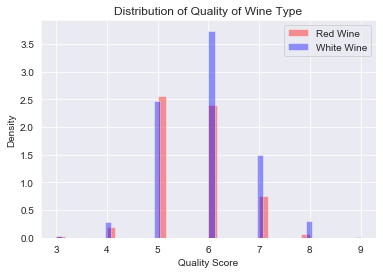

In [12]:
# 와인 종류별 품질의 분포 시각화
import seaborn as sns
import matplotlib.pyplot as plt

red_q = wine.loc[wine["type"] == "red", "quality"]
white_q = wine.loc[wine["type"] == "white", "quality"]

sns.set_style('darkgrid') # seaborn에는 다양한 플롯들이 있는데 distplot(분포플롯) 사용
sns.distplot(red_q, norm_hist=True, kde=False, color='red', label='Red Wine')
sns.distplot(white_q, norm_hist=True, kde=False, color='blue', label='White Wine')
plt.title('Distribution of Quality of Wine Type')
plt.xlabel('Quality Score')
plt.ylabel('Density')
plt.legend();

In [13]:
# 와인 종류별 분산, 평균
wine.groupby("type")["quality"].aggregate(["std", "mean"])

,std,mean
type,,
red,0.807569,5.636023
white,0.885639,5.877909


In [14]:
# 와인 종류별 품질 차이의 통계적 유의성 검정(표본 2개 t검정 -> 평균의 차이 검증)
import statsmodels.api as sm

t_stat, p_value, df = sm.stats.ttest_ind(red_q,white_q)
't-stat: {:3f}, p-value: {:4f}'.format(t_stat, p_value) # 결론: 평균의 차이가 있음

't-stat: -9.685650, p-value: 0.000000'

### 상관분석

In [15]:
wine.corr()[['quality']]

,quality
fixed_acidity,-0.076743
volatile_acidity,-0.265699
citric_acid,0.085532
residual_sugar,-0.036980
chlorides,-0.200666
free_sulfur_dioxide,0.055463
total_sulfur_dioxide,-0.041385
density,-0.305858
pH,0.019506
sulphates,0.038485


In [16]:
# 변수들 사이의 상관 계수 계산
wine_corr = wine.corr()
wine_corr

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
fixed_acidity,1.000000,0.219008,0.324436,-0.111981,0.298195,-0.282735,-0.329054,0.458910,-0.252700,0.299568,-0.095452,-0.076743
volatile_acidity,0.219008,1.000000,-0.377981,-0.196011,0.377124,-0.352557,-0.414476,0.271296,0.261454,0.225984,-0.037640,-0.265699
citric_acid,0.324436,-0.377981,1.000000,0.142451,0.038998,0.133126,0.195242,0.096154,-0.329808,0.056197,-0.010493,0.085532
residual_sugar,-0.111981,-0.196011,0.142451,1.000000,-0.128940,0.402871,0.495482,0.552517,-0.267320,-0.185927,-0.359415,-0.036980
chlorides,0.298195,0.377124,0.038998,-0.128940,1.000000,-0.195045,-0.279630,0.362615,0.044708,0.395593,-0.256916,-0.200666
free_sulfur_dioxide,-0.282735,-0.352557,0.133126,0.402871,-0.195045,1.000000,0.720934,0.025717,-0.145854,-0.188457,-0.179838,0.055463
total_sulfur_dioxide,-0.329054,-0.414476,0.195242,0.495482,-0.279630,0.720934,1.000000,0.032395,-0.238413,-0.275727,-0.265740,-0.041385
density,0.458910,0.271296,0.096154,0.552517,0.362615,0.025717,0.032395,1.000000,0.011686,0.259478,-0.686745,-0.305858
pH,-0.252700,0.261454,-0.329808,-0.267320,0.044708,-0.145854,-0.238413,0.011686,1.000000,0.192123,0.121248,0.019506
sulphates,0.299568,0.225984,0.056197,-0.185927,0.395593,-0.188457,-0.275727,0.259478,0.192123,1.000000,-0.003029,0.038485


In [17]:
# 양의 상관관계
wine_corr.loc[wine_corr['quality'] > 0, 'quality']

citric_acid            0.085532
free_sulfur_dioxide    0.055463
pH                     0.019506
sulphates              0.038485
alcohol                0.444319
quality                1.000000
Name: quality, dtype: float64

In [18]:
# 음의 상관관계
wine_corr.loc[wine_corr['quality'] < 0, 'quality']

fixed_acidity          -0.076743
volatile_acidity       -0.265699
residual_sugar         -0.036980
chlorides              -0.200666
total_sulfur_dioxide   -0.041385
density                -0.305858
Name: quality, dtype: float64

### 산점도 행렬

In [19]:
red_sample = wine.loc[wine['type']=='red',:]
white_sample = wine.loc[wine['type']=='white',:]

In [20]:
# 데이터 200개만 선택(산점도에는 너무 많은 데이터 부적합)
red_idx = np.random.choice(red_sample.index, replace=True, size=200)
white_idx = np.random.choice(white_sample.index, replace=True, size=200)

In [21]:
# 데이터 합치기
wine_sample = red_sample.loc[red_idx,].append(white_sample.loc[white_idx,])
wine_sample.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,type
1120,7.9,0.54,0.34,2.5,0.076,8.0,17.0,0.99235,3.20,0.72,13.1,8,red
107,6.2,0.63,0.31,1.7,0.088,15.0,64.0,0.99690,3.46,0.79,9.3,5,red
1490,7.1,0.22,0.49,1.8,0.039,8.0,18.0,0.99344,3.39,0.56,12.4,6,red
498,10.7,0.35,0.53,2.6,0.070,5.0,16.0,0.99720,3.15,0.65,11.0,8,red
940,9.6,0.33,0.52,2.2,0.074,13.0,25.0,0.99509,3.36,0.76,12.4,7,red


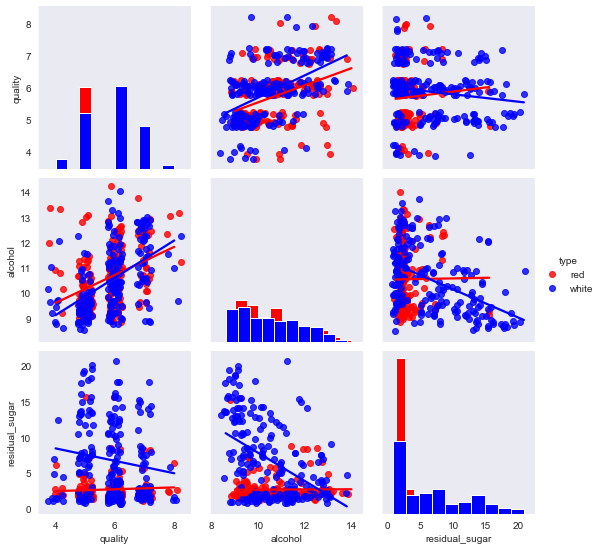

In [22]:
# pairplot(히스토그램+스캐터플롯)으로 시각화
sns.set_style('dark')
sns.pairplot(wine_sample, vars=['quality','alcohol','residual_sugar'], kind='reg', plot_kws={'ci':False, 'x_jitter':0.25, 'y_jitter':0.25},
             diag_kind='hist', diag_kws={'bins': 10, 'alpha': 1}, hue='type', palette=dict(red='red',white='blue',markers=['o','s']));